## Regresión lineal simple

En este notebook se muestra un ejemplo sencillo del modelo de regresión simple con una evaluación del mismo

In [8]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
# Importar el dataset y observar los 5 primeros registros
df = pd.read_csv('../../00-datasets/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [20]:
X = df.iloc[:, :-1].values # Seleccionamos los campos y registros de las variables independientes (YearsExperience)
y = df.iloc[:, -1].values # Seleccionamos la columna dependiente (Salary en USD)
print(X.shape)
print(y.shape)

(30, 1)
(30,)


Ahora se divide (Train/Test) el dataset para la realización del modelo

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

Entrenamos el modelo de Regresión Lineal

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Teniendo el modelo de Regresión entrenado, pasamos a predecir los datos del dataset del Test

In [23]:
y_test_pred = regressor.predict(X_test)

Ahora vamos a observar los resultados del entrenamiento del modelo de Regresión

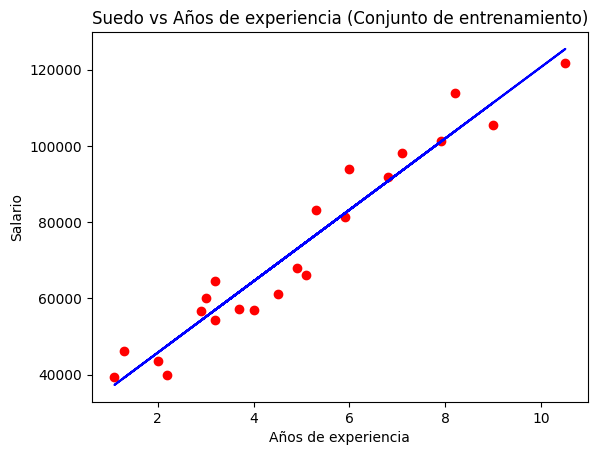

In [29]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Suedo vs Años de experiencia (Conjunto de entrenamiento)')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.show()

Conclusión:

Se observa que el modelo (línea azul), predice con bastante acierto los valores de entrenamiento, representando su comportamiento lineal

Ahora vamos a observar los resultados del test del modelo de Regresión

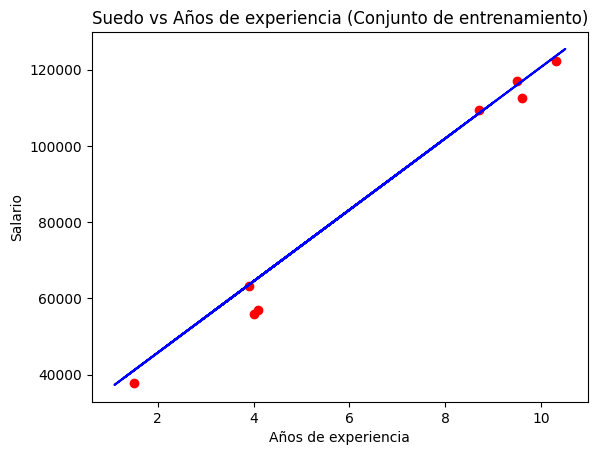

In [30]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Suedo vs Años de experiencia (Conjunto de entrenamiento)')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.show()

Conclusión:

Se observa que el modelo (línea azul), predice con bastante acierto los valores de test, que no conocía, representando su comportamiento lineal

Por último, se realizará la evaluación del modelo a través del coeficiente de determinación	R cuadrado

In [33]:
y_test_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)

In [34]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_test_pred) # test
r2training=r2_score(y_train, y_train_pred) #train
print('El coeficiente de determinación del regresor es:', r2)
print('El coeficiente de determinación del regresor training es:', r2training)

El coeficiente de determinación del regresor es: 0.9779208335417602
El coeficiente de determinación del regresor training es: 0.9395413526983522


Se observa que el coeficiente de determinación del regresor es mejor para los datos que no conocía del modelo, en cuanto el de training, está un poco más bajo, pero igualmente son buenos resultados ya que se acercan a 1, y en las graficas se observaba su acercamiento a los valores conocidos 